In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1: Yang Shen
- Name 2:
- Name 3:


# In Class Assignment One
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class, to the best of your ability. Once class has started you may rework your answers as a team for the initial part of the assignment. 

<a id="top"></a>
## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#linearnumpy">Linear Regression</a>
* <a href="#sklearn">Using Scikit Learn for Regression</a>
* <a href="#classification">Linear Classification</a>

________________________________________________________________________________________________________

<a id="Loading"></a>
<a href="#top">Back to Top</a>
## Loading the Data
Please run the following code to read in the "diabetes" dataset from sklearn's data loading module. 

This will load the data into the variable `ds`. `ds` is a `bunch` object with fields like `ds.data` and `ds.target`. The field `ds.data` is a numpy matrix of the continuous features in the dataset. **The object is not a pandas dataframe. It is a numpy matrix.** Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is a continuous value we are trying to predict. Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [2]:
from __future__ import print_function
from sklearn.datasets import load_diabetes
import numpy as np



ds = load_diabetes()

# this holds the continuous feature data
# because ds.data is a matrix, there are some special properties we can access (like 'shape')
print('features shape:', ds.data.shape, 'format is:', ('rows','columns')) # there are 442 instances and 10 features per instance
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (442, 10) format is: ('rows', 'columns')
range of target: 25.0 346.0


In [3]:
from pprint import pprint

# we can set the fields inside of ds and set them to new variables in python
pprint(ds.data) # prints out elements of the matrix
pprint(ds.target) # prints the vector (all 442 items)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])
array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37

________________________________________________________________________________________________________
<a id="linearnumpy"></a>
<a href="#top">Back to Top</a>
## Using Linear Regression 
In the videos, we derived the formula for calculating the optimal values of the regression weights (you must be connected to the internet for this equation to show up properly):

$$ w = (X^TX)^{-1}X^Ty $$

where $X$ is the matrix of values with a bias column of ones appended onto it. For the diabetes dataset one could construct this $X$ matrix by stacking a column of ones onto the `ds.data` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$

**Question 1:** For the diabetes dataset, how many elements will the vector $w$ contain?

In [4]:
# Enter your answer here (or write code to calculate it)

11

#

11

________________________________________________________________________________________________________

**Exercise 1:** In the following empty cell, use the given equation above (using numpy matrix operations) to find the values of the optimal vector $w$. You will need to be sure $X$ and $y$ are created like the instructor talked about in the video. Don't forget to include any modifications to $X$ to account for the bias term in $w$. You might be interested in the following functions:

- `import numpy as np`
- `np.hstack((mat1,mat2))` stack two matrices horizontally, to create a new matrix
- `np.ones((rows,cols))` create a matrix full of ones
- `my_mat.T` takes transpose of numpy matrix named `my_mat`
- `np.dot(mat1,mat2)` or `mat1 @ mat2` is matrix multiplication for two matrices
- `np.linalg.inv(mat)` gets the inverse of the variable `mat`

In [5]:
# Write you code here, print the values of the regression weights using the 'print()' function in python
import numpy as np

X = np.hstack((ds.data,np.ones((442,1))))

y = ds.target

w = np.linalg.inv(X.T @ X) @ X.T @ds.target

w



array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639,  152.13348416])


___
<a id="sklearn"></a>
<a href="#top">Back to Top</a>
# Start of Live Session Coding

**Exercise 2:** Scikit-learn also has a linear regression fitting implementation. Look at the scikit learn API and learn to use the linear regression method. The API is here: 

- API Reference: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Use the sklearn `LinearRegression` module to check your results from the previous question. 

**Question 2**: Did you get the same parameters? 

In [6]:
from sklearn.linear_model import LinearRegression

# write your code here, print the values of model by accessing 
#    its properties that you looked up from the API
reg = LinearRegression()
reg.fit(ds.data,ds.target)
reg.coef_
reg.intercept_

print('model coefficients are: ', reg.coef_ )
print('==================')
print('model intercept is', reg.intercept_)
print('==================')
print('Answer to question is', 'I get the same parameters results from the previous question ')


model coefficients are:  [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
model intercept is 152.1334841628965
Answer to question is I get the same parameters results from the previous question 


________________________________________________________________________________________________________

Recall that to predict the output from our model, $\hat{y}$, from $w$ and $X$ we need to use the following formula:

- $\hat{y}=w^TX^T$, for row vector $\hat{y}$
- OR 
- $\hat{y}=Xw$, for column vector $\hat{y}$

Where $X$ is a matrix with example instances in *each row* of the matrix (and the bias term).

**Exercise 3:** 
- *Part A:* Use matrix multiplication to predict output using numpy, $\hat{y}_{numpy}$. 
 - **Note**: you may need to make the regression weights a column vector using the following code: `w = w.reshape((len(w),1))` This assumes your weights vector is assigned to the variable named `w`.
- *Part B:* Use the sklearn API to get the values for $\hat{y}_{sklearn}$ (hint: use the `.predict` function of the API).
- *Part C:* Calculate the mean squared error between your prediction from numpy and the target, $\frac{1}{M}\sum_i(y-\hat{y}_{numpy})^2$. 
- *Part D:* Calculate the mean squared error between your sklearn prediction and the target, $\frac{1}{M}\sum_i(y-\hat{y}_{sklearn})^2$.
 - **Note**: parts C and D can each be completed in one line of code using numpy. There is no need to write a `for` loop.

In [7]:
# Use this block to answer the questions

# w = w.reshape((len(w),1)) # make w a column vector
wc = w.reshape((len(w),1)) # make w a column vector

#part A
pred_numpy = wc.T @ X.T
print('MSE Numpy is:', pred_numpy)

print('==============================')

#part B
pred_sklean = reg.predict(ds.data)
print('MSE Sklearn is:', pred_sklean)

print('==============================')
from sklearn.metrics import mean_squared_error

#part C
print('Mean squared error between your prediction from numpy and the target is'
      ,mean_squared_error(ds.target.reshape((1,len(ds.target))), pred_numpy) )

print('==============================')
#part D
print('Mean squared error between your sklearn prediction and the target is'
      ,mean_squared_error(ds.target, pred_sklean))


MSE Numpy is: [[206.11706979  68.07234761 176.88406035 166.91796559 128.45984241
  106.34908972  73.89417947 118.85378669 158.81033076 213.58408893
   97.07853583  95.1016223  115.06673301 164.67605023 103.07517946
  177.17236996 211.75953205 182.84424343 147.99987605 124.01702527
  120.33094632  85.80377894 113.11286302 252.44934852 165.48821056
  147.72187623  97.12824075 179.09342974 129.05497324 184.78138552
  158.71515746  69.47588393 261.50255826 112.81897436  78.37194762
   87.66624129 207.92460213 157.87686037 240.84370686 136.93372685
  153.48187659  74.15703284 145.63105805  77.8280105  221.0786645
  125.22224022 142.60147066 109.4926324   73.14037106 189.87368742
  157.93636782 169.55816531 134.18186217 157.72356219 139.1077439
   72.73252701 207.8289973   80.10834588 104.08562488 134.57807971
  114.23779529 180.67760064  61.12644508  98.7215441  113.79626149
  189.96141244 148.98263155 124.33457266 114.83969622 122.00224605
   73.91315064 236.70948329 142.31366526 124.51427

________________________________________________________________________________________________________
<a id="classification"></a>
<a href="#top">Back to Top</a>
## Using Linear Classification
Now lets use the code you created to make a classifier with linear boundaries. Run the following code in order to load the iris dataset.

In [8]:
from sklearn.datasets import load_iris
import numpy as np

# this will overwrite the diabetes dataset
ds = load_iris()
print('features shape:', ds.data.shape) # there are 150 instances and 4 features per instance
print('original number of classes:', len(np.unique(ds.target)))

# now let's make this a binary classification task
ds.target = ds.target>1
print ('new number of classes:', len(np.unique(ds.target)))

features shape: (150, 4)
original number of classes: 3
new number of classes: 2


________________________________________________________________________________________________________

**Exercise 4:** Now use linear regression to come up with a set of weights, `w`, that predict the class value. You can use numpy or sklearn, whichever you prefer. This is exactly like you did before for the *diabetes* dataset. However, instead of regressing to continuous values, you are just regressing to the integer value of the class (0 or 1), like we talked about in the video (using the hard limit function). 
 - **Note**: If you are using numpy, remember to account for the bias term when constructing the feature matrix, `X`.
 

In [9]:
# write your code here and print the values of the weights 

from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(ds.data, ds.target)


# Print the weights of the linear classifier.
print('model coefficients are: ',reg.coef_)
print('==============================')
print('model intercept is ', reg.intercept_)

model coefficients are:  [-0.04587608  0.20276839  0.00398791  0.55177932]
model intercept is  -0.6952818633256037


________________________________________________________________________________________________________

**Exercise 5:** Finally, use a hard decision function on the output of the linear regression to make this a binary classifier. This is just like we talked about in the video, where the output of the linear regression passes through a function: 

- $\hat{y}=g(w^TX^T)$ where
 - $g(w^TX^T)$ for $w^TX^T < \alpha$ maps the predicted class to `0` 
 - $g(w^TX^T)$ for $w^TX^T \geq \alpha$ maps the predicted class to `1`. 

Here, alpha is a threshold for deciding the class. 

**Question 3**: What value for $\alpha$ makes the most sense? What is the accuracy of the classifier given the $\alpha$ you chose? 

Note: You can calculate the accuracy with the following code: `accuracy = float(sum(yhat==y)) / len(y)` assuming you choose variable names `y` and `yhat` for the target and prediction, respectively.

[0.   0.   0.   0.01 0.01 0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.07
 0.07 0.12 0.12 0.24 0.24 0.32 0.32 1.  ]
[0.   0.02 0.54 0.54 0.58 0.62 0.76 0.76 0.84 0.84 0.88 0.88 0.92 0.92
 0.94 0.94 0.96 0.96 0.98 0.98 1.   1.  ]
[ 2.10815109  1.10815109  0.73866296  0.69525283  0.65589553  0.65483055
  0.62810248  0.61966666  0.59094004  0.58642458  0.57591699  0.56361793
  0.520602    0.50173181  0.48869229  0.46310453  0.43145762  0.35214527
  0.34689518  0.32562181  0.32316062 -0.26463888]


Text(0.5, 1.0, 'ROC curve')

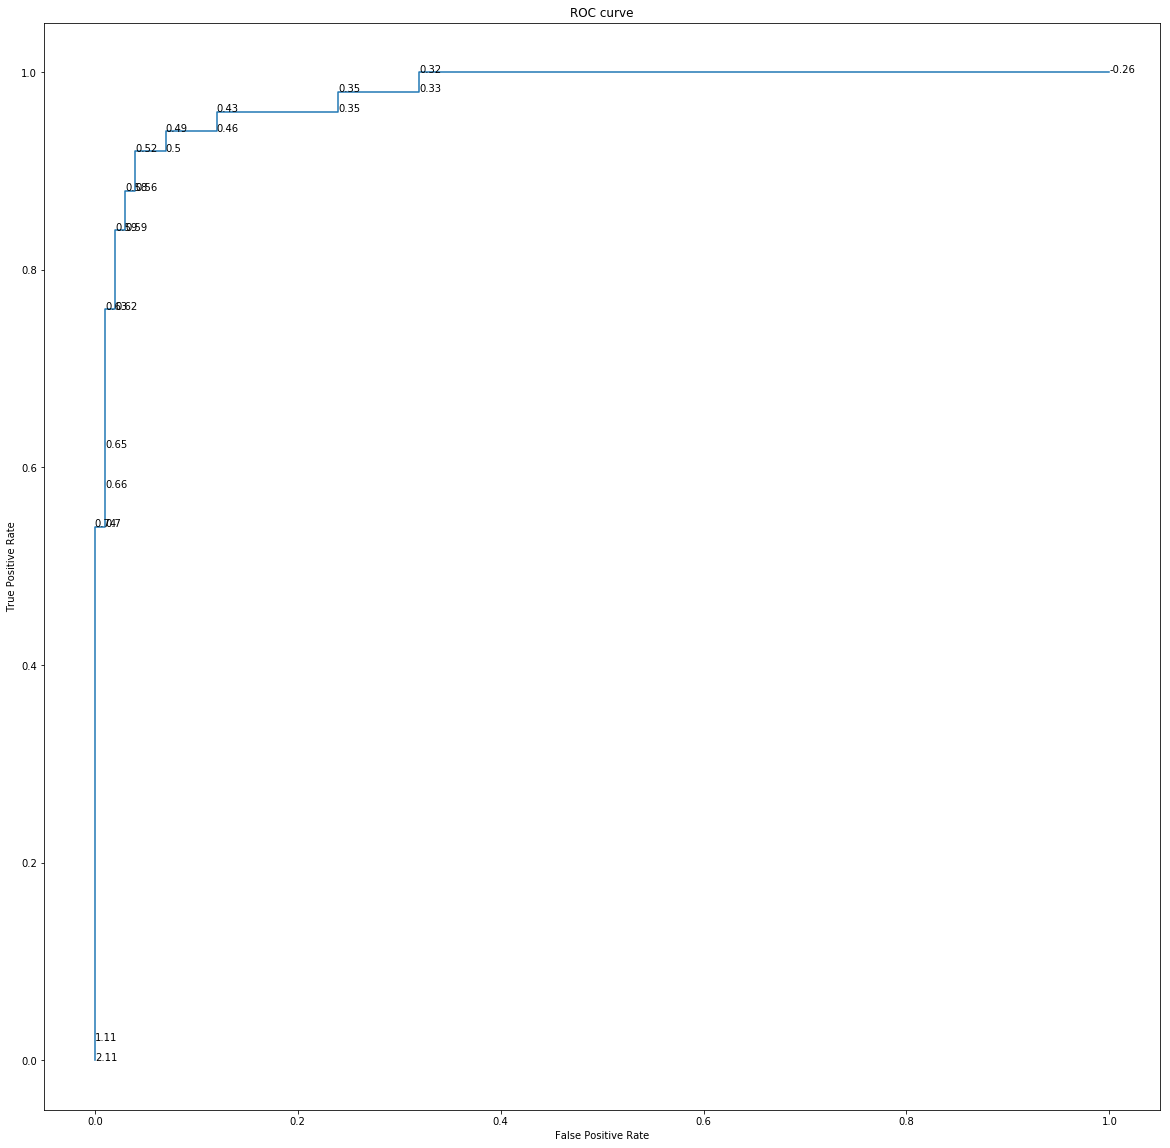

In [12]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt

X = np.hstack((ds.data,np.ones((150,1))))

y = ds.target

w = np.linalg.inv(X.T @ X) @ X.T @ds.target

wc = w.reshape((len(w),1))

pred_numpy = wc.T @ X.T

y = ds.target.reshape((len(ds.target),1))
pred = pred_numpy.reshape(150,1)
fpr, tpr, thresholds = roc_curve(y, pred)
threshold = np.round(thresholds, decimals=2)
print(fpr)
print(tpr)
print(thresholds)


plt.figure(figsize=(20,20))
plt.plot(fpr,tpr)
labels = [threshold[i] for i in range(22)]
for i in range (22):
    xy=(fpr[i],tpr[i])
    plt.annotate(labels[i],xy)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [13]:
import numpy as np
yhatarr = np.zeros(150)
pred = w.T @ X.T  
y = ds.target

accuracy = 0
for i in range(len(yhatarr)):
    yhatarr[i] = 0 if pred[i] < 0.520602 else 1
    accuracy = float(sum(yhatarr[i] == y[i] for i in range(len(y)))) / len(y)
    
print('value for  𝛼  makes the most sense is: ','0.52')
print('==============================')
print('accuracy of the classifier given the 𝛼 : ',accuracy)

value for  𝛼  makes the most sense is:  0.52
accuracy of the classifier given the 𝛼 :  0.9466666666666667


If I just look at the ROC curve, we can see that the label of thresholds, 0.52 is the best thresholds. I learn it from EMSI7357 and we can decided which thresholds is good from the ROC plot. It have high true positive rate and low false positive rate. The accuracy is 0.9467, which is good.

________________________________________________________________________________________________________

That's all! Please **save (make sure you saved!!!) and upload your rendered notebook** and please include **team member names** in the notebook submission.